In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import pandas as pd

In [2]:
def myconvolve(x, h):
    N = x.size
    M = h.size
    P = M - 1 #Modify this line
    x_padded = np.concatenate((np.zeros(P), x, np.zeros(P)))
    L = M + N - 1
    y = np.zeros(L)
    h_rev = h[::-1]
    for n in range(L):
        y[n] = np.sum(x_padded[n:n+M]*h_rev)
    return y

In [3]:
def plot3(i, nx, x, nh, h, ny, y):
    plt.figure(i)
    ax3 = plt.subplot(3,1,3)
    plt.stem(ny, y, use_line_collection=True)
    plt.subplot(3,1,1, sharex=ax3)
    plt.stem(nx, x, use_line_collection=True)
    plt.subplot(3,1,2, sharex=ax3)
    plt.stem(nh, h, use_line_collection=True)

In [4]:
n = np.arange(-5,21)
h1 = 1.0*(n >= 0)
h2 = np.zeros_like(n); h2[(n==0)]=1; h2[(n==1)]=-1
x1 = np.zeros_like(n) + (n >= 0)*(n < 6)
x2 = h1

Compute convolutions

In [5]:
ya = convolve(x1, h1)
yb = convolve(x1, h2)
yc = convolve(x2, h1)
yd = convolve(x2, h2)

plt.close('all')
ny = np.arange(2*min(n), 2*max(n)+1)

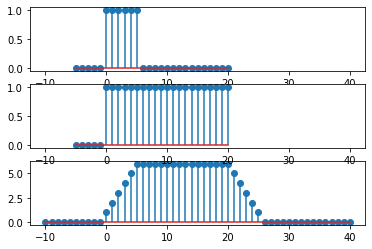

In [6]:
plot3(1, n, x1, n, h1, ny, ya)

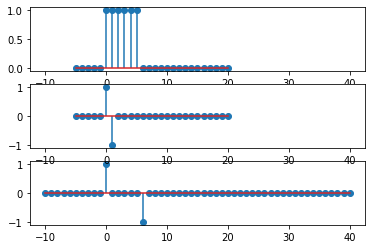

In [7]:
plot3(1, n, x1, n, h2, ny, yb)

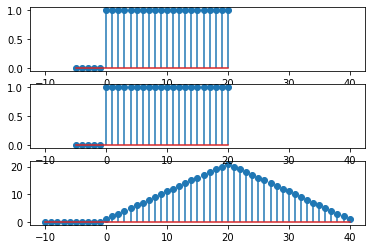

In [8]:
plot3(1, n, x2, n, h1, ny, yc)

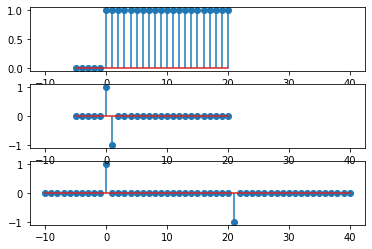

In [9]:
plot3(1, n, x2, n, h2, ny, yd)

<StemContainer object of 3 artists>

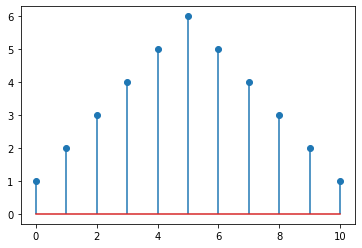

In [10]:
p = np.ones(6)
z = convolve(p, p)
plt.close('all')
n = np.arange(0, 6)
nz = np.arange(0,11) #Modify this line
plt.stem(nz, z, use_line_collection=True)

In [11]:
z2 = myconvolve(p,p)
print(z2 == z)

[ True  True  True  True  True  True  True  True  True  True  True]


**Removing short term variations from a signal**

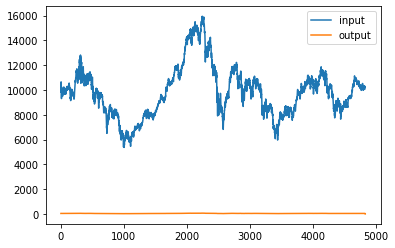

In [21]:
df = pd.read_excel('Ibex35.xlsx', sheet_name='Hoja1')
x = df['Ibex 35'].values
f = df['fecha'].values
plt.close('all')
plt.plot(x, label='input')
M = 257
h = np.zeros(6); h[(n==0)]=1/M #Modify this line
y = convolve(x, h)
plt.plot(y, label='output')
plt.legend(loc='best')